In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\anura\Desktop\Project 4- Climate Change Modeling\data\raw\climate_nasa.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Data Overview:\n", data.head())
print("\nData Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())


Data Overview:
                        date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon diox

In [11]:
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Handle 'commentsCount' using regression-based imputation
# Prepare the data for regression
reg_data = data[['likesCount', 'commentsCount']].dropna()
X = reg_data[['likesCount']].values
y = reg_data['commentsCount'].values

# Train a regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict missing values
missing_comments = data[data['commentsCount'].isnull()]
data.loc[data['commentsCount'].isnull(), 'commentsCount'] = regressor.predict(missing_comments[['likesCount']])

# Handle 'text' column by dropping rows with missing text
data = data.dropna(subset=['text'])

# Confirm missing values are handled
print("\nRemaining Missing Values:\n", data.isnull().sum())



Remaining Missing Values:
 date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [12]:
trend_data = data[['date', 'likesCount', 'commentsCount']].copy()

# Ensure the data is sorted by date for trend analysis
trend_data = trend_data.sort_values('date')
print("Trend Analysis Data:\n", trend_data.head())


Trend Analysis Data:
                          date  likesCount  commentsCount
255 2020-09-15 21:25:05+00:00          27       6.000000
178 2020-09-15 21:30:35+00:00           7       8.000000
286 2020-09-15 21:32:15+00:00           4       7.604985
177 2020-09-15 21:36:05+00:00           3       7.000000
176 2020-09-15 21:36:59+00:00          16       8.000000


In [13]:
sentiment_data = data[['text']].copy()
print("Sentiment Analysis Data Sample:\n", sentiment_data.sample(5))


Sentiment Analysis Data Sample:
                                                   text
17                    Love this post! Great pedagogy 🙏
286  We all play a part....as a world we need to do...
105  I havent seen any difference  anywhere. Go ahe...
130  Are these the same 'Scientist' that claimed we...
291  Pois e preocupantemas acreditem no actual pres...


In [14]:
regression_data = data[['likesCount', 'commentsCount']].copy()
print("Regression Data:\n", regression_data.head())


Regression Data:
    likesCount  commentsCount
0           2       7.045942
1           0       6.486900
2           1       3.000000
3           4       7.604985
4          16      26.000000


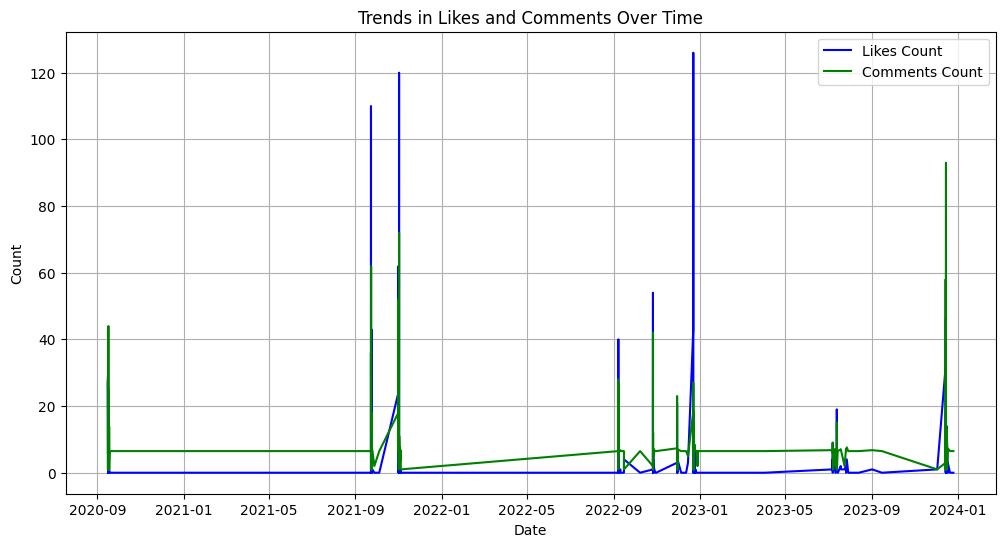

In [15]:
# Plot trends in likes and comments over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='date', y='likesCount', label='Likes Count', color='blue')
sns.lineplot(data=trend_data, x='date', y='commentsCount', label='Comments Count', color='green')
plt.title('Trends in Likes and Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


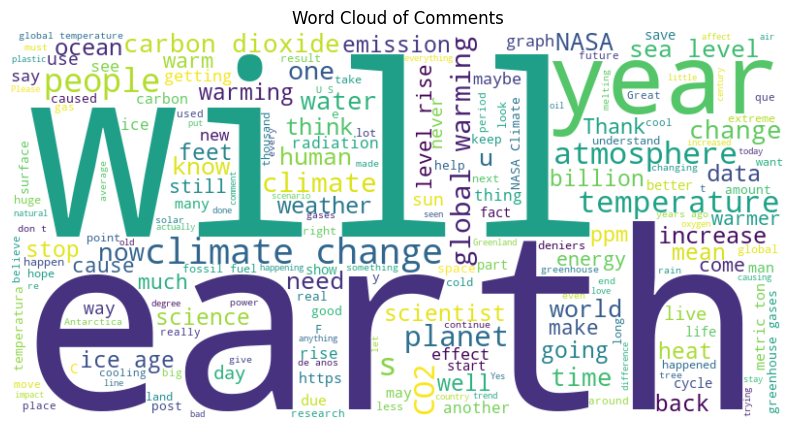

In [16]:
# Generate a word cloud from the text data
all_text = " ".join(sentiment_data['text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


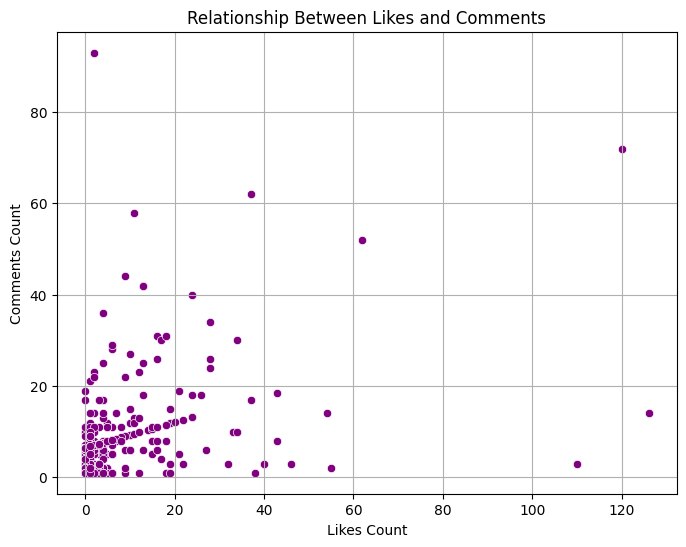

Correlation Matrix:
                likesCount  commentsCount
likesCount       1.000000       0.396551
commentsCount    0.396551       1.000000


In [17]:
# Scatter plot for regression data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=regression_data, x='likesCount', y='commentsCount', color='purple')
plt.title('Relationship Between Likes and Comments')
plt.xlabel('Likes Count')
plt.ylabel('Comments Count')
plt.grid(True)
plt.show()

# Display correlation matrix
correlation = regression_data.corr()
print("Correlation Matrix:\n", correlation)


In [19]:
import os

# Define the path for the processed data folder
processed_data_dir = os.path.join('data', 'processed')
os.makedirs(processed_data_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Save each subset as a CSV file in the 'processed' subfolder
trend_data.to_csv(os.path.join(processed_data_dir, 'trend_data.csv'), index=False)
sentiment_data.to_csv(os.path.join(processed_data_dir, 'sentiment_data.csv'), index=False)
regression_data.to_csv(os.path.join(processed_data_dir, 'regression_data.csv'), index=False)

print(f"Processed data files have been saved in '{processed_data_dir}' directory.")


Processed data files have been saved in 'data\processed' directory.
